# **Création d'un réseau de neurones profond** - *Inspiré de la formation de Machine Learnia*

Voici le type de réseau de neurones profond que nous souhaitons développer :

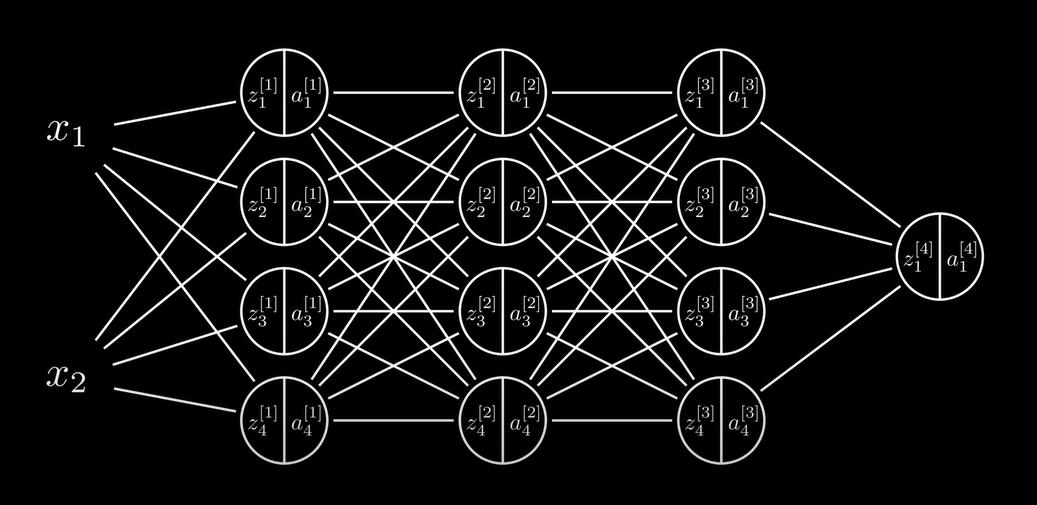

Nous allons partir de la définition de notre réseau de neurones à 2 couches :

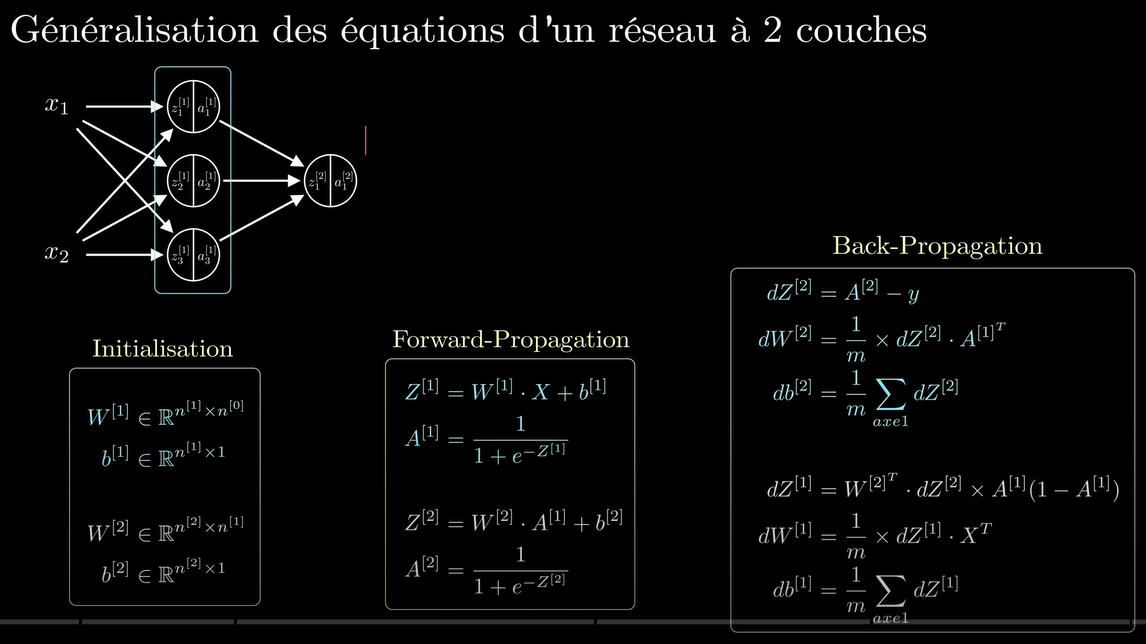

Nous établissons conventionnellement les couches suivantes :

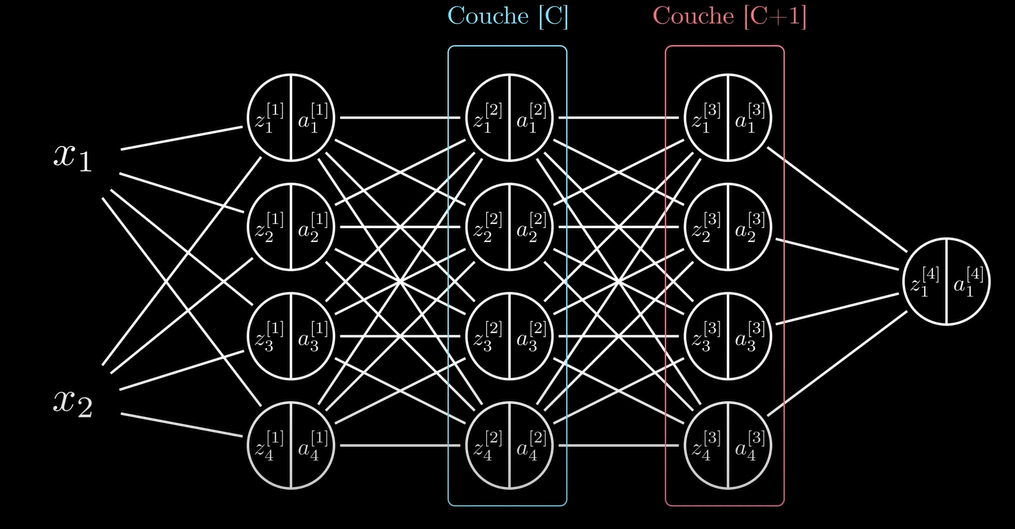

# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# 1. Fonctions

Voici les dimensions généralisées pour l'initialisation de nos paramètres W et b :

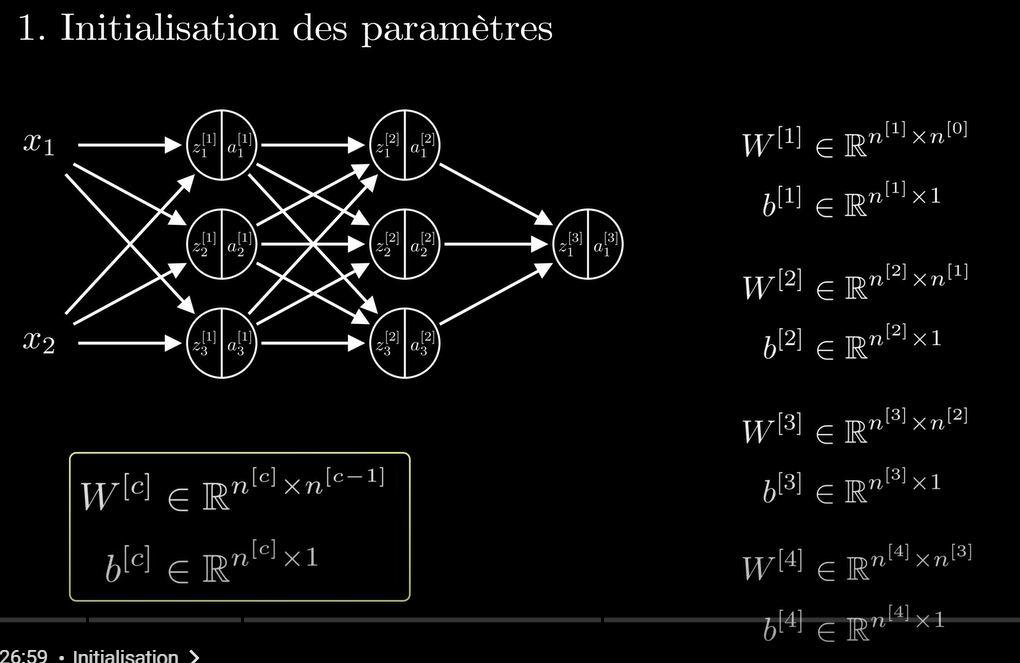

Pour rappel, la couche de nos entrées (ici x1 et x2) est la couche 0 :

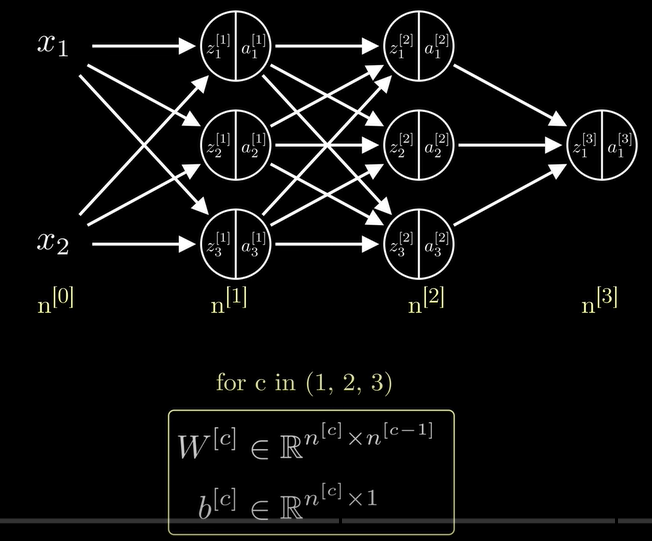

Nous pouvons définir notre fonction d'initialisation généralisée de nos paramètres en respectant les dimensions :

In [2]:
def initialisation(dimensions):

    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

De même, on généralise notre Forward Propagation :

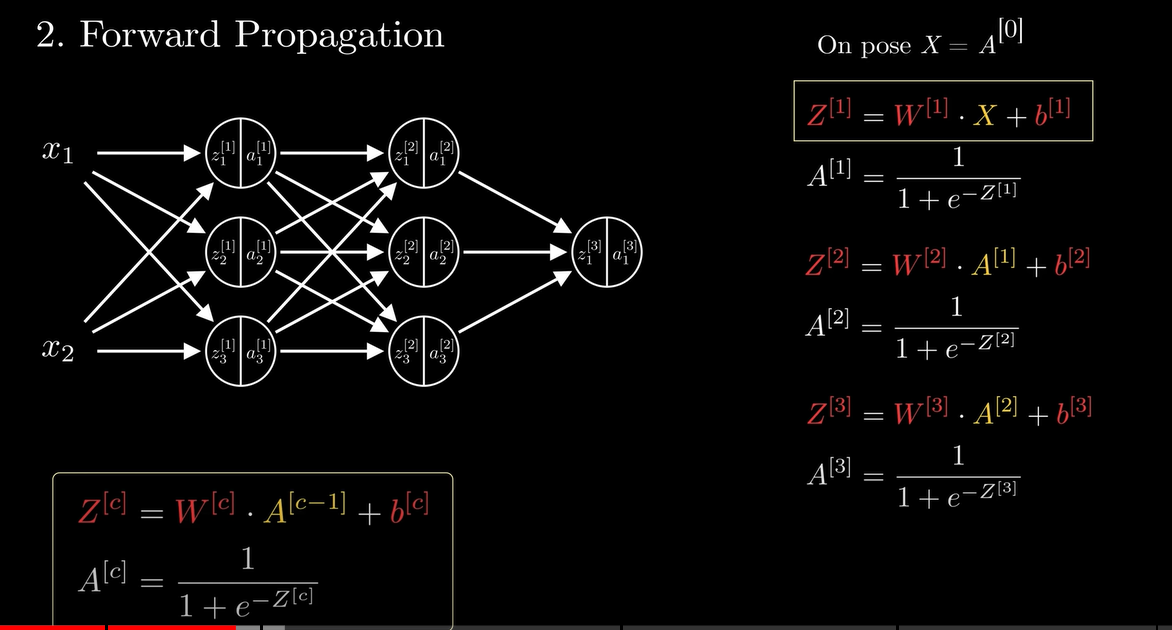

On définit notre Forward Propagation tel que :

In [3]:
def forward_propagation(X, parametres):

  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

De même, on généralise notre Back-Propagation :

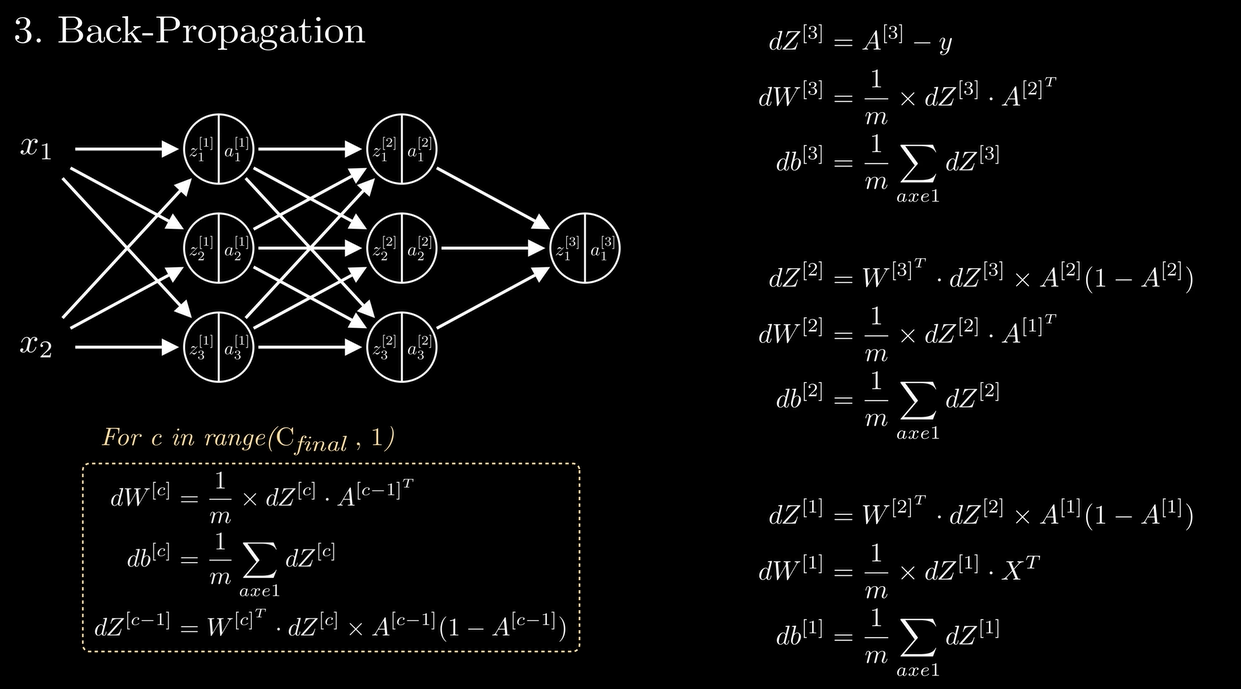

On définit notre Back-Propagation tel que :

In [4]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

De même, on généralise la mise à jour de nos poids et biais :

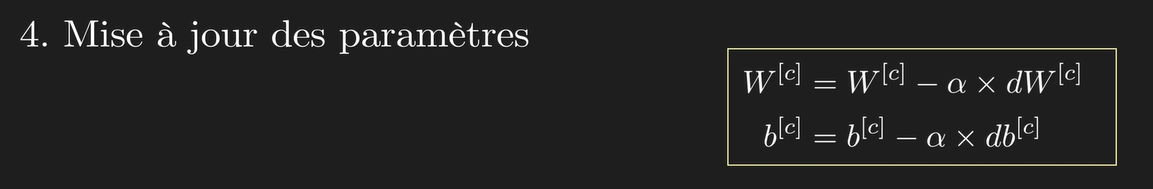

On définit notre mise à jour de poids et biais tel que :

In [5]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

On peut définir notre prédiction généralisée, à travers la Forward Propagation, tel que :

In [6]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

Voici la fonction pour tracer notre frontière de décision :

In [7]:
def plot_decision_boundary(X, y, parametres):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parametres)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    plt.scatter(X[0, :], X[1, :], c=y, edgecolors='k', cmap='summer')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Voici notre fonction finale permettant de créer un réseau de neurones profond et adaptable :

In [8]:
def deep_neural_network(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, n_iter=3000):
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))
    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = log_loss(y.flatten(), Af.flatten())
        y_pred = predict(X, parametres)
        training_history[i, 1] = accuracy_score(y.flatten(), y_pred.flatten())

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    # Plot decision boundary
    plot_decision_boundary(X, y, parametres)

    return training_history

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


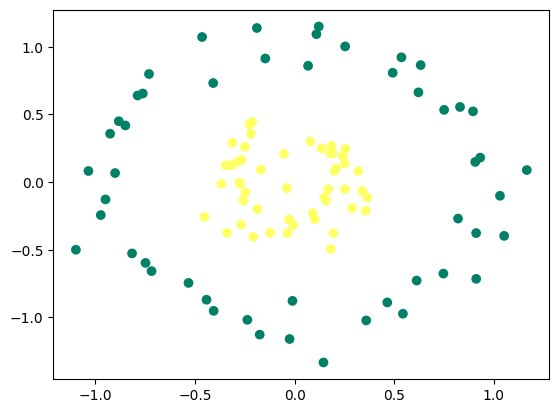

In [9]:
# Dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()


100%|██████████| 3000/3000 [00:21<00:00, 138.25it/s]


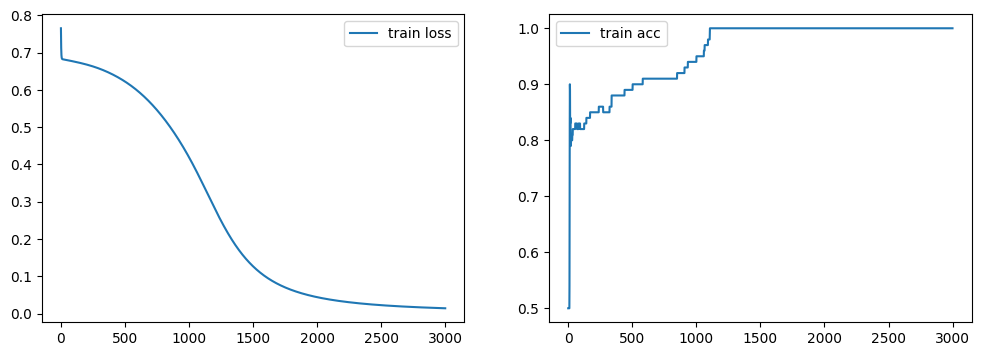

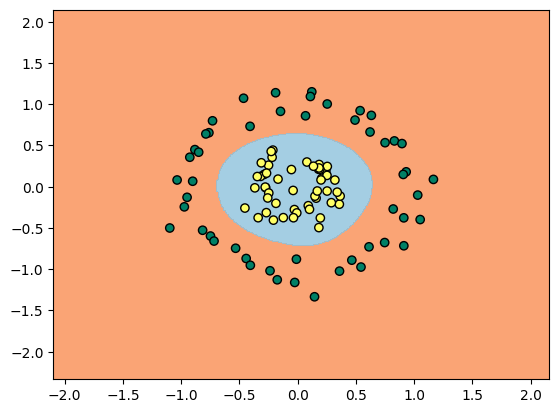

array([[0.76537816, 0.5       ],
       [0.73318091, 0.5       ],
       [0.71304419, 0.5       ],
       ...,
       [0.01403589, 1.        ],
       [0.01402475, 1.        ],
       [0.01401363, 1.        ]])

In [10]:
# Train the model and plot decision boundary
deep_neural_network(X, y, hidden_layers=(16, 16, 16), learning_rate=0.1, n_iter=3000)